In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [2]:
df = pd.read_csv('../data/housing.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
tree = DecisionTreeRegressor()

In [24]:
left  = df[df.LSTAT < 9.67]
right = df[df.LSTAT >= 9.67]

In [25]:
root_error = np.mean((df['PRICE'] - df['PRICE'].mean())**2)

In [26]:
right_error = np.mean((right['PRICE'] - right['PRICE'].mean())**2)
left_error  = np.mean((left['PRICE'] - left['PRICE'].mean())**2)

In [27]:
right_error

24.32308736092969

In [28]:
left_error

79.95297868897926

In [29]:
num_samples = df.shape[0]
right_samples = right.shape[0]
left_samples = left.shape[0]

In [30]:
num_samples

506

In [31]:
right_samples

298

In [32]:
left_samples

208

In [33]:
right_samples / num_samples * right_error

14.32466409793883

In [34]:
left_samples / num_samples * left_error

32.86604657570689

In [35]:
root_error - (right_samples / num_samples * right_error) - (left_samples / num_samples * left_error)

37.22884548251987

In [ ]:
left  = left[left.Tax < 273]
right = left[left.Tax >= 273]

In [59]:
# initialize your algorithm
tree = DecisionTreeRegressor(max_depth=3)

In [60]:
# declare X & y
X = df.drop(['PRICE', 'Prediction'], axis=1)
y = df['PRICE']

tree.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

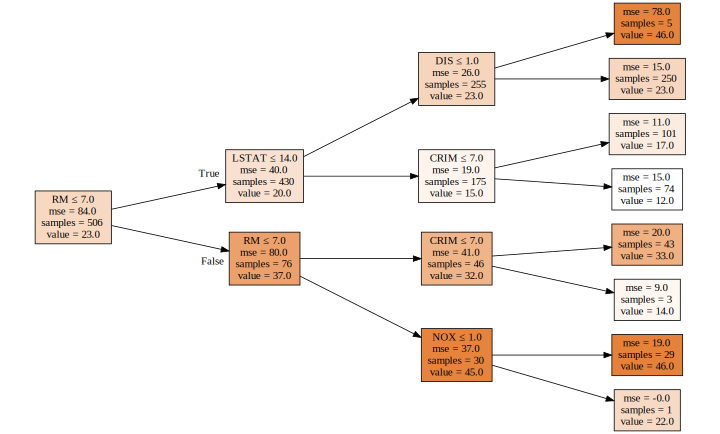

In [61]:
from prep import draw_tree

draw_tree(tree, X)

In [41]:
# this will go ahead and make predictions from your data
df['Prediction'] = tree.predict(X)

In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,27.427273
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.629744
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,32.748780
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,32.748780
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,32.748780


In [43]:
df['RM'].unique()

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 6.047,
       6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 5.933, 5.841, 5.85 ,
       5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069, 5.682, 5.786,
       6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998, 5.888, 7.249,
       6.383, 6.816, 6.145, 5.927, 5.741, 6.456, 6.762, 7.104, 6.29 ,
       5.787, 5.878, 5.594, 5.885, 6.417, 5.961, 6.065, 6.245, 6.273,
       6.286, 6.279, 6.14 , 6.232, 5.874, 6.727, 6.619, 6.302, 6.167,
       6.389, 6.63 , 6.015, 6.121, 7.007, 7.079, 6.405, 6.442, 6.249,
       6.625, 6.163, 8.069, 7.82 , 7.416, 6.781, 6.137, 5.851, 5.836,
       6.127, 6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928,
       6.176, 6.021, 5.872, 5.731, 5.87 , 5.856, 5.879, 5.986, 5.613,
       5.693, 6.431, 5.637, 6.458, 6.326, 6.372, 5.822, 5.757, 6.335,
       5.942, 6.454,

In [55]:
max_gain = 0
col_split = None

for col in df.columns:
    for value in df[col].unique():
        left = df[df[col] < value]
        right = df[df[col] >= value]
        root_error = np.mean(df['PRICE'] - df['PRICE'].mean()**2)
        
        left_error = np.mean(left['PRICE'] - left['PRICE'].mean()**2)
        right_error = np.mean(right['PRICE'] - right['PRICE'].mean()**2)
        
        info_gain = root_error - (right.shape[0]/df.shape[0]) * right_error - (left.shape[0] / df.shape[0])*left_error
        if info_gain > max_gain:
            max_gain = info_gain
            col_split = col

In [56]:
max_gain

53.41490142053823

In [57]:
col_split

'PRICE'

In [58]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [62]:
# score provides the R2 value
tree.score(X, y)

0.8177924678036445

In [63]:
# boosting starts with a NAIVE prediction
naive_guess = y.mean()

In [65]:
# get the error column
gradient = y - y.mean()

In [66]:
# initialize a decision tree -- it will usually be shallow
tree = DecisionTreeRegressor(max_depth=4)

In [67]:
# fit a tree on X & the gradient
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [69]:
naive_guess += tree.predict(X)

In [72]:
gradient = y - naive_guess

In [73]:
gradient

0     -3.427273
1     -0.029744
2      1.951220
3      0.651220
4      3.451220
         ...   
501   -5.027273
502   -1.029744
503   -8.848780
504   -5.427273
505   -9.729744
Name: PRICE, Length: 506, dtype: float64

In [74]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
naive_guess

array([27.42727273, 21.62974359, 32.74878049, 32.74878049, 32.74878049,
       21.62974359, 21.62974359, 20.02083333, 20.02083333, 20.02083333,
       20.02083333, 21.62974359, 20.02083333, 21.62974359, 21.62974359,
       21.62974359, 21.62974359, 16.23896104, 21.62974359, 21.62974359,
       16.23896104, 21.62974359, 16.23896104, 16.23896104, 16.23896104,
       16.23896104, 16.23896104, 16.23896104, 21.62974359, 27.42727273,
       16.23896104, 21.62974359, 16.23896104, 16.23896104, 16.23896104,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 27.42727273,
       32.74878049, 27.42727273, 21.62974359, 21.62974359, 21.62974359,
       21.62974359, 21.62974359, 20.02083333, 20.02083333, 20.02083333,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 20.02083333,
       32.74878049, 21.62974359, 27.42727273, 21.62974359, 21.62974359,
       21.62974359, 20.02083333, 21.62974359, 27.42727273, 32.74878049,
       21.62974359, 21.62974359, 21.62974359, 21.62974359, 21.62

In [77]:
naive_guess += tree.predict(X)

In [80]:
gradient = y - naive_guess

In [82]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [84]:
naive_guess += tree.predict(X)

In [86]:
naive_guess[:5]

array([26.59189641, 22.15935565, 31.91340417, 34.14436374, 34.14436374])

In [87]:
y[:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [93]:
gradient = y - naive_guess

In [94]:
tree.fit(X, gradient)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [96]:
learning_rate = .1

In [99]:
naive_guess += tree.predict(X) * learning_rate

In [100]:
naive_guess

array([26.57840985, 22.14586909, 32.01678217, 34.24774175, 34.13087719,
       26.81847574, 19.14233306, 21.87265499, 16.38973977, 18.86911896,
       21.87265499, 19.14233306, 18.86911896, 19.26815116, 19.26815116,
       19.26815116, 21.95395672, 15.21306475, 19.26815116, 19.26815116,
       13.1579731 , 19.26815116, 13.1579731 , 15.21306475, 15.21306475,
       15.21306475, 15.21306475, 15.21306475, 19.26815116, 23.01058864,
       13.1579731 , 17.2130595 , 10.67859391, 13.1579731 , 13.1579731 ,
       20.99622572, 20.99622572, 20.99622572, 25.62864142, 29.2195454 ,
       34.54105316, 29.10268084, 24.67014008, 24.67014008, 22.14586909,
       19.14233306, 19.14233306, 18.86911896, 16.38973977, 18.86911896,
       19.14233306, 22.14586909, 24.08930952, 21.08577349, 18.99493705,
       33.84335804, 22.14586909, 26.69527441, 21.94835216, 19.14233306,
       19.14233306, 17.53342281, 22.14586909, 26.57840985, 34.13087719,
       24.08930952, 21.08577349, 21.08577349, 19.14233306, 21.08

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gbm = GradientBoostingRegressor()

In [103]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
tree = DecisionTreeRegressor(max_depth=)

In [104]:
gbm.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [105]:
gbm.score(X, y)

0.9761405838418584

In [106]:
gbm.feature_importances_

array([2.52321890e-02, 2.57507828e-04, 2.09203306e-03, 8.72746661e-04,
       3.64443531e-02, 4.10968562e-01, 8.84128931e-03, 8.40286447e-02,
       1.27962093e-03, 1.17545775e-02, 3.47428377e-02, 1.04788513e-02,
       3.73006787e-01])

In [107]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')